### General linear second order differential equations. Boundary value problems



$$
\left\{\begin{array}{l}
\underbrace{a(x) u_{x x}(x)}_{\text {diffusion }}+\underbrace{b(x) u_{x}(x)}_{\text {advection }}+\underbrace{c(x) u(x)}_{\text {growth/decay }}=\underbrace{f(x)}_{\text {source }} x \in ( 0,1) \\
\begin{array}{l}
u(0)=\alpha \\
u(1)=\beta
\end{array}
\end{array}\right\}
$$
Approximation:
$a_{i} \frac{u_{i-1}-2 u_{i}+u_{i+1}}{h^{2}}+b_{i} \frac{u_{i+1}-u_{i-1}}{2 h}+c_{i} u_{i}=f_{i}$ where $a_{i}=a\left(x_{i}\right), b_{i}=b\left(x_{i}\right), c_{i}=c\left(x_{i}\right)$.

We may write it as a linear system $A \cdot \vec{u}=\vec{f}$, where
$$
\begin{aligned}
&\vec{f}=\left(\begin{array}{c}
f_{1}-\left(\frac{a_{1}}{h^{2}}-\frac{b_{1}}{2 h}\right) \alpha \\
f_{2} \\
\vdots \\
f_{n-1} \\
f_{n}-\left(\frac{a_{n}}{h^{2}}+\frac{b_{n}}{2 h}\right) \beta
\end{array}\right)
\end{aligned}
$$
and

$$
A = (1/h^2)\left(\begin{array}{ccccc}
h^{2} c_{1}-2 a_{1} & a_{1}+\frac{h b_{1}}{2} & & &  \\
a_{2}-\frac{h b_{2}}{2} & h^{2} c_{2}-2 a_{2} & a_{2}+\frac{h b_{2}}{2} & &\\
& \ddots & \ddots & \ddots & \\
& & a_{n-1}-\frac{h b_{n-1}}{2} & h^{2} c_{n-1}-2 a_{n-1} & a_{n-1}+\frac{h b_{n-1}}{2} \\
& & & a_{n}-\frac{h b_{n}}{2} & h^{2} c_{n}-2 a_{n}
\end{array}\right)
$$

In [1]:
import numpy as np
from scipy.sparse import spdiags
from scipy.linalg import solve
import matplotlib.pyplot as plt
from population_dynamics import ExplicitEuler, Integrator, RK2

In [2]:
#Initialize
x = np.linspace(0,1,100)
uLeft = 0
uRight = 0

def a_coef(x):
    return x**2 + 1
def b_coef(x):
    return 2*x
def c_coef(x):
    return  0*x
def f_source(x):
    return np.cos(x)

dx = x[1]-x[0]
nx = len(x)

In [3]:
#Create diagonal matrix
ac = a_coef(x)
bc = b_coef(x)
cc = c_coef(x)
aMat = spdiags([np.roll((ac + dx*bc/2) * 1/dx**2,1),
                (dx**2 * cc - 2* ac) * 1/dx**2,
                np.roll((ac - dx*bc/2) * 1/dx**2, -1)],[1,0,-1],nx,nx)

fs = f_source(x) 
rhs = np.hstack((fs[0] - (ac[0]/dx**2 - bc[0]/(2*dx)) * uLeft,
                fs[1:-1],
                fs[-1] - (ac[-1]/dx**2 - bc[-1]/(2*dx)) * uRight))


u = 0*x
print("The system is solvable:", np.linalg.matrix_rank(aMat.toarray()) == len(u))
u = np.linalg.solve(aMat.toarray(), rhs)

The system is solvable: True


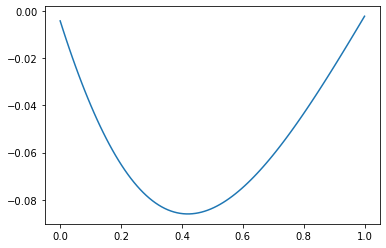

In [4]:
plt.plot(x, u)
plt.show()

### Initial value problems

Consider the second order linear equation
$$
y^{\prime \prime}+p(t) y^{\prime}+q(t) y=g(t)
$$
with initial conditions $y(0)=a, y'(0)=b$. We can convert the second order equation to a system.

Let $y_{1}(t):=y(t)$ and $y_{2}(t)=y^{\prime}(t)$, then we obtain
$$
\left[\begin{array}{l}
y_{1}^{\prime} \\
y_{2}^{\prime}
\end{array}\right]=\left[\begin{array}{c}
y_{2} \\
g(t) - p(t) y_{2}- q(t) y_{1}
\end{array}\right], \quad\left[\begin{array}{l}
y_{1}(0) \\
y_{2}(0)
\end{array}\right]=\left[\begin{array}{c}
a \\
b
\end{array}\right]
$$

In [3]:
class LinearSecond:
    """This class defines the second order linear equation y''+p(t)y'+q(t)y=g(t).

    Attributes:
        p(t)     Function
        q(t)     Function
        g(t)     Function
    """
    def __init__(self,p,q,g):
        self.p = p
        self.q = q
        self.g = g

    def __call__(self,y,t):
        ynew = np.zeros(len(y))
        ynew[0] =  y[1]
        ynew[1] =  self.g(t) - self.p(t) * y[1] - self.q(t) * y[0]

        return ynew

In [11]:
y0 = np.array([1,-2])
tmin = 0
tmax = 4
eq1 = LinearSecond(lambda t: -1, lambda t: 3, lambda t: t)
eul1 = Integrator(ExplicitEuler(eq1),y0,tmin,tmax,2000)
dynamics1 = eul1.integrate()

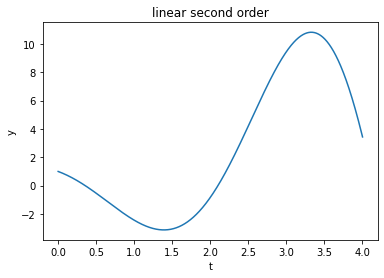

In [12]:
plt.plot(eul1.getIntegrationTime(),
                 dynamics1[:,0])
plt.ylabel("y")
plt.xlabel("t")
plt.title('linear second order')
plt.show()

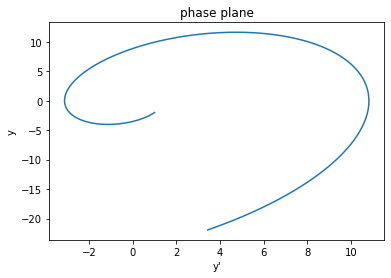

In [15]:
#phase plane
plt.plot(dynamics1[:,0], dynamics1[:,1])
plt.ylabel("y")
plt.xlabel("y'")
plt.title('phase plane')
plt.show()

### Numerical Errors

The exact solution for the IVP $y''+y=0$, $y(0)=1=y'(0)$ is $y(t) = cos(t) + sin(t)$
But the numerical errors in the above method produce a solution that is not exactly periodic

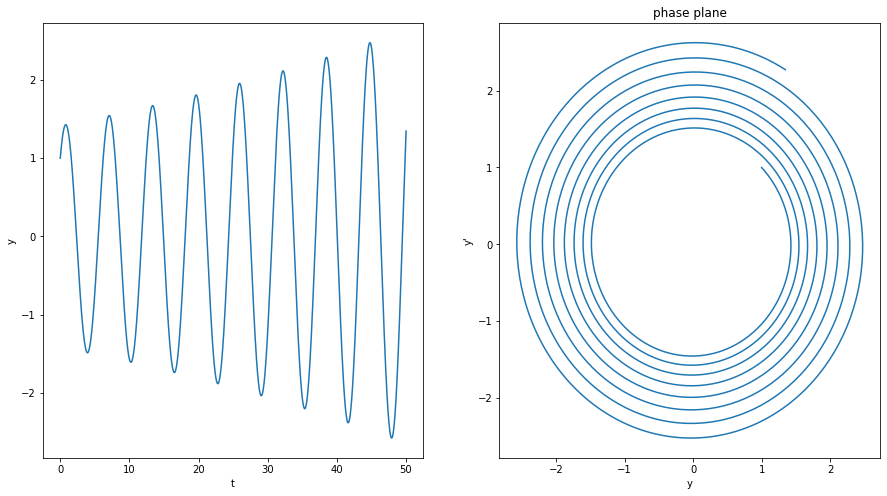

In [7]:
#Undamped Free Vibrations
y0 = np.array([1,1])
tmin = 0
tmax = 50
eq2 = LinearSecond(lambda t: 0, lambda t: 1, lambda t: 0)
eul2 = Integrator(ExplicitEuler(eq2),y0,tmin,tmax,2000)
#eul2 = Integrator(RK2(eq2),y0,tmin,tmax,2000)
dynamics2 = eul2.integrate()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.plot(eul2.getIntegrationTime(),
                 dynamics2[:,0])
ax1.set_ylabel('y')
ax1.set_xlabel('t')
ax2.plot(dynamics2[:,0], dynamics2[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y'")
ax2.set_xlabel('y')
plt.show()

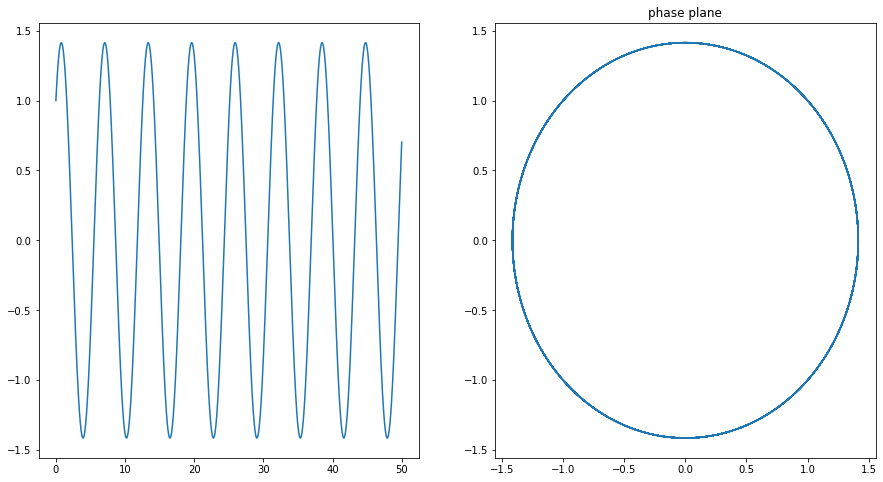

In [25]:
def exact_sol(t):
    return np.sin(t) + np.cos(t)

def exact_sol_der(t):
    return  - np.sin(t) + np.cos(t)

t = np.linspace(tmin, tmax, 2000)
y = exact_sol(t)
dy = exact_sol_der(t)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.plot(t,y)
ax1.set_ylabel('y')
ax1.set_xlabel('t')
ax2.plot(y,dy)
ax2.set_title("phase plane")
ax2.set_ylabel("y'")
ax2.set_xlabel('y')
plt.show()

#### Damped Free Vibrations

$$
 y^{\prime \prime}(t)+ 0.125 y^{\prime}(t)+ y(t)=0
$$

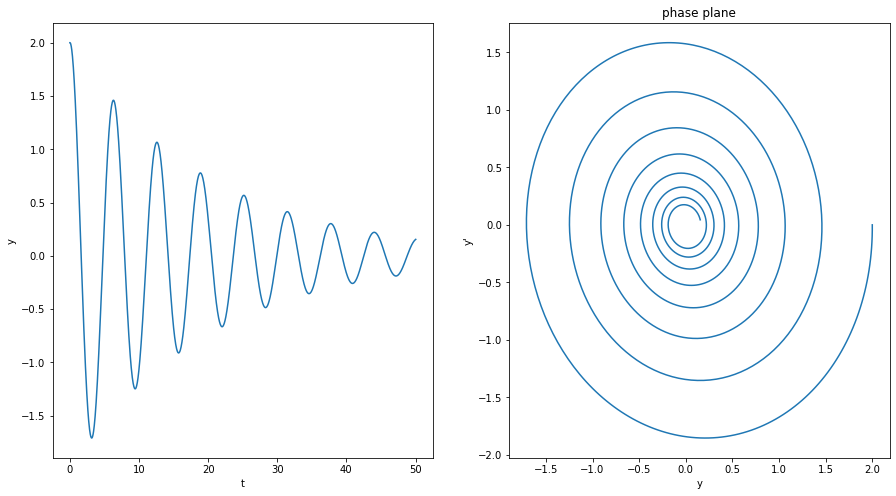

In [29]:
y0 = np.array([2,0])
tmin = 0
tmax = 50
eq3 = LinearSecond(lambda t: 0.125, lambda t: 1, lambda t: 0)
eul3 = Integrator(ExplicitEuler(eq3),y0,tmin,tmax,2000)
dynamics3 = eul3.integrate()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.plot(eul3.getIntegrationTime(),
                 dynamics3[:,0])
ax1.set_ylabel('y')
ax1.set_xlabel('t')
ax2.plot(dynamics3[:,0], dynamics3[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y'")
ax2.set_xlabel('y')
plt.show()

#### Forced Vibrations Without Damping

$$
y^{\prime \prime}+y=0.5 \cos \omega t, \quad y(0)=0, \quad y'(0)=0
$$

with $\omega = 0.8, 1$

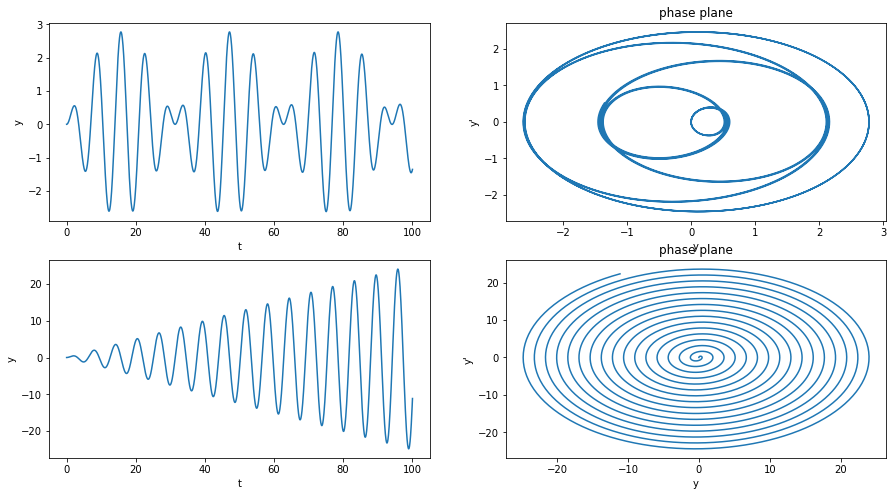

In [6]:
#Try with a different solver!
y0 = np.array([0,0])
tmin = 0
tmax = 100
eq4 = LinearSecond(lambda t: 0, lambda t: 1, lambda t: 0.5*np.cos(0.8*t))
eul4 = Integrator(RK2(eq4),y0,tmin,tmax,2000)
dynamics4 = eul4.integrate()

eq5 = LinearSecond(lambda t: 0, lambda t: 1, lambda t: 0.5*np.cos(t))
eul5 = Integrator(RK2(eq5),y0,tmin,tmax,2000)
dynamics5 = eul5.integrate()


fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15,8))

ax1.plot(eul4.getIntegrationTime(),
                 dynamics4[:,0])
ax1.set_ylabel('y')
ax1.set_xlabel('t')
ax2.plot(dynamics4[:,0], dynamics4[:,1])
ax2.set_title("phase plane")
ax2.set_ylabel("y'")
ax2.set_xlabel('y')

ax3.plot(eul5.getIntegrationTime(),
                 dynamics5[:,0])
ax3.set_ylabel('y')
ax3.set_xlabel('t')
ax4.plot(dynamics5[:,0], dynamics5[:,1])
ax4.set_title("phase plane")
ax4.set_ylabel("y'")
ax4.set_xlabel('y')

plt.show()